In [9]:
# import geopandas as gpd
# from geopandas.tools import sjoin
import pandas as pd
import matplotlib.pyplot as plt
#from fiona.crs import from_epsg
#from descartes.patch import PolygonPatch
import seaborn as sns
import random

In [10]:
data_df = pd.read_csv('Kaagle_Upload.csv')
data_df.head()


C:\Users\Muskan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201597UD71807,1,9,0,7,0,2,1,0,0,...,4.0,3.0,5.0,1.0,0.0,0.0,0.0,0.0,3.0,-1.0
1,201597UD71607,1,9,0,7,0,4,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201597UD71607,2,9,0,8,0,4,0,0,0,...,8.0,3.0,0.0,0.0,2.0,0.0,0.0,9.0,3.0,-1.0
3,201597UD71412,1,9,0,17,0,0,2,0,1,...,5.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,-1.0
4,201597UD71407,1,9,0,17,0,0,0,0,1,...,1.0,3.0,0.0,0.0,1.0,0.0,0.0,9.0,1.0,-1.0


In [5]:
# data_ex = pd.read_excel('Kaagle_Upload.xlsx')
# print("Column headings:")
# # print(data_ex.columns)

In [11]:
#data_df.isnull().sum()
data_df.drop(['casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile'],axis=1,inplace=True)

In [12]:
data_df.drop(['urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
             'pedestrian_crossing-human_control', 'junction_control',
             'number_of_vehicles','number_of_casualties','accident_severity',
             'location_easting_osgr', 'location_northing_osgr',
             'NUmber_of_Casualities_unique_to_accident_index',
              'No_of_Vehicles_involved_unique_to_accident_index','driver_imd_decile', 'driver_home_area_type',
              'vehicle_imd_decile','engine_capacity_(cc)', 'propulsion_code','age_of_driver','hit_object_in_carriageway',
              'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
              '1st_point_of_impact','journey_purpose_of_driver','vehicle_reference','towing_and_articulation'],axis=1,inplace=True )

In [13]:
data_df.drop(['lsoa_of_accident_location'],axis=1,inplace=True)
data_df.head()

,accident_index,vehicle_type,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,was_vehicle_left_hand_drive?,sex_of_driver,age_band_of_driver,age_of_vehicle,...,speed_limit,junction_detail,2nd_road_class,2nd_road_number,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
0,201597UD71807,9,7,0,2,1,1,1,8,7,...,30,9,3,719,0,1,1,1,0,0
1,201597UD71607,9,7,0,4,0,1,2,9,8,...,50,1,3,78,0,1,1,1,0,0
2,201597UD71607,9,8,0,4,0,1,1,8,10,...,50,1,3,78,0,1,1,1,0,0
3,201597UD71412,9,17,0,0,2,1,1,5,14,...,60,0,-1,0,0,6,3,4,0,0
4,201597UD71407,9,17,0,0,0,1,2,5,9,...,60,0,-1,0,1,1,2,2,0,0


In [9]:
data_df.describe()

,vehicle_type,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,was_vehicle_left_hand_drive?,sex_of_driver,age_band_of_driver,age_of_vehicle,longitude,...,speed_limit,junction_detail,2nd_road_class,2nd_road_number,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
count,172651.000000,172651.000000,172651.000000,172651.000000,172651.000000,172651.000000,172651.000000,172651.000000,172651.000000,172616.000000,...,172651.000000,172651.000000,172651.000000,172651.000000,172651.000000,172651.000000,172651.000000,172651.000000,172651.000000,172651.000000
mean,9.587538,12.619128,0.123695,2.693752,0.200317,0.997168,1.403983,6.013889,5.308756,-1.333643,...,39.115267,2.309271,2.725574,366.551511,0.791116,1.927130,1.496012,1.312005,0.097017,0.055829
std,8.553914,6.196932,0.962603,3.271155,0.746933,0.144793,0.599155,2.941734,5.886045,1.385422,...,14.419023,2.513436,3.205848,1263.556682,1.890468,1.634918,1.475554,0.553811,0.678387,0.532711
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-7.389288,...,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000
25%,9.000000,7.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,-1.000000,-2.213847,...,30.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,9.000000,17.000000,0.000000,1.000000,0.000000,1.000000,1.000000,6.000000,4.000000,-1.254277,...,30.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,9.000000,18.000000,0.000000,6.000000,0.000000,1.000000,2.000000,8.000000,10.000000,-0.181826,...,50.000000,3.000000,6.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000
max,98.000000,18.000000,9.000000,8.000000,5.000000,2.000000,3.000000,11.000000,104.000000,1.755569,...,70.000000,9.000000,6.000000,9999.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000


In [10]:
data_df.dtypes

accident_index                              object
vehicle_type                                 int64
vehicle_manoeuvre                            int64
vehicle_location-restricted_lane             int64
junction_location                            int64
skidding_and_overturning                     int64
was_vehicle_left_hand_drive?                 int64
sex_of_driver                                int64
age_band_of_driver                           int64
age_of_vehicle                               int64
longitude                                  float64
latitude                                   float64
police_force                                 int64
date                                        object
day_of_week                                  int64
time                                        object
local_authority_(district)                   int64
local_authority_(highway)                   object
1st_road_class                               int64
1st_road_number                

In [21]:
data_df.weather_conditions.unique()

array([1, 3, 2, 4, 9, 5, 8, 6, 7], dtype=int64)

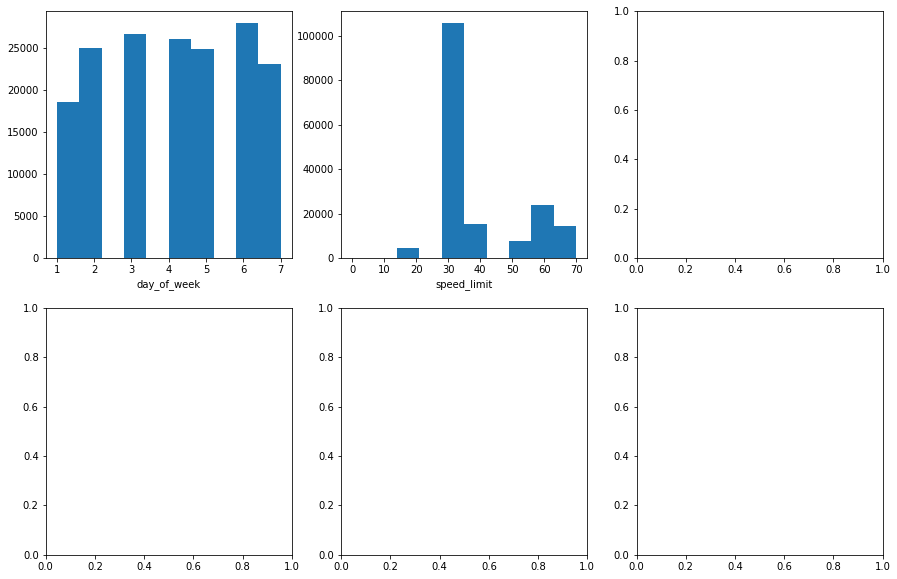

In [12]:
#EDA - Histogram of numeric vars
cols = ["day_of_week","speed_limit"]

f,a = plt.subplots(2,3,figsize=(15,10))
a = a.ravel()

for idx, ax in  enumerate(a):
    if idx < 2:
        ax.hist(data_df[cols[idx]],bins=10)
        #ax.set_title(cols[idx])
        ax.set_xlabel(cols[idx])
        # ax.set_ylabel(yaxes[idx])

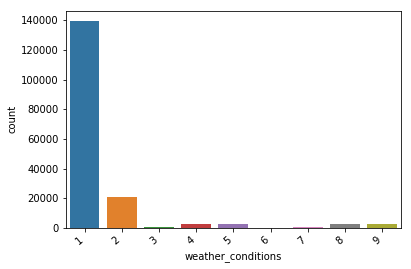

In [13]:
wplot = sns.countplot(data=data_df,x="weather_conditions")
wplot.set_xticklabels(wplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

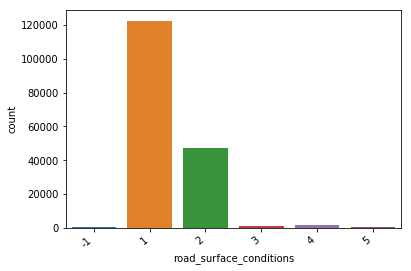

In [14]:
rplot = sns.countplot(data=data_df,x="road_surface_conditions")
rplot.set_xticklabels(rplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [14]:
data_df['date'] = pd.to_datetime(data_df['date'], format='%d/%m/%Y')

In [15]:
data_df['year'] = data_df['date'].dt.year
data_df['month'] = data_df['date'].dt.month
data_df['day'] = data_df['date'].dt.day

In [16]:
data_df.drop(['date'],axis=1,inplace=True)
data_df.head()

,accident_index,vehicle_type,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,was_vehicle_left_hand_drive?,sex_of_driver,age_band_of_driver,age_of_vehicle,...,2nd_road_number,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,year,month,day
0,201597UD71807,9,7,0,2,1,1,1,8,7,...,719,0,1,1,1,0,0,2015,7,15
1,201597UD71607,9,7,0,4,0,1,2,9,8,...,78,0,1,1,1,0,0,2015,7,28
2,201597UD71607,9,8,0,4,0,1,1,8,10,...,78,0,1,1,1,0,0,2015,7,28
3,201597UD71412,9,17,0,0,2,1,1,5,14,...,0,0,6,3,4,0,0,2015,12,31
4,201597UD71407,9,17,0,0,0,1,2,5,9,...,0,1,1,2,2,0,0,2015,7,26


In [17]:
data_df['time'] = pd.to_datetime(data_df['time'], format=' %H:%M:%S')
data_df['hour'] = data_df['time'].dt.hour

In [18]:
data_df.drop(['time'], axis=1, inplace=True)

In [25]:
df_temp= data_df.sample(n=50000)

#df_temp1= df_temp.drop(['local_authority_(district)','day','hour','month'], axis=1)
df_temp.insert(0, 'accident', 1)

In [20]:
df_temp =df_temp.reset_index(drop=True)
df_temp.drop(['accident_index'],axis=1,inplace=True)
df_temp.head()


,accident,vehicle_type,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,was_vehicle_left_hand_drive?,sex_of_driver,age_band_of_driver,age_of_vehicle,...,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,year,month,day,hour
0,1,9,18,0,0,0,1,1,5,-1,...,0,1,5,2,0,0,2015,8,23,11.0
1,1,9,18,0,8,0,1,2,8,12,...,0,1,1,1,0,0,2015,5,31,15.0
2,1,9,18,0,0,0,1,1,6,12,...,0,6,1,1,0,0,2015,7,28,23.0
3,1,9,4,0,0,0,1,2,6,-1,...,0,1,1,1,0,0,2015,8,26,14.0
4,1,9,9,0,5,0,1,2,9,10,...,0,1,2,2,0,0,2015,9,22,8.0


In [ ]:
df_nonacc_n_acc = pd.DataFrame(columns=[
 'longitude',
 'latitude',
 'month',
 'hour',
 'day',
 'local_authority_(district)',
 '1st_road_class',
 '1st_road_number',
 'speed_limit',
 'accident',
 'weather_conditions',
  'junction_detail'  
  ])
maxdist = data_df['local_authority_(district)'].max()
#for each of the 3758 accidents, create 3 other data points
for index, row in df_temp.iterrows():
    #print(row['Accident_Index'], row['Cluster'])
    
    #add itself
    nday = row['day']
    nmonth = row['month']
    nhr = row['hour']
        #nday = random.randint(1, 365)
        #dtdelta = datetime.timedelta(days=nday)
        #dt_targ = dt_first + dtdelta
        
    longitude = row['longitude']
    latitude = row['latitude']
        #nclust = row['Cluster']
        #dweek = dt_targ.weekday()
        #nhr = random.randint(0, 23)
    lauthor = row['local_authority_(district)']
    roadclass = row['1st_road_class']
    roadnum = row['1st_road_number']
    splimit = row['speed_limit']
    accident = 1
    weather= row['weather_conditions']
    junction= row['junction_detail']
    dfnew = pd.DataFrame([[longitude,latitude,nmonth,nhr,nday,lauthor,roadclass,roadnum,splimit,accident,weather,junction]], columns=['longitude','latitude','month','hour','day','local_authority_(district)','1st_road_class','1st_road_number','speed_limit','accident','weather_conditions','junction_detail'])
    df_nonacc_n_acc = df_nonacc_n_acc.append(dfnew,ignore_index=True)
    
    i=0
    while(i<3):
        #dt_first = datetime.datetime(2010,1,1)
        nday = random.randint(1, 28)
        nmonth = random.randint(1, 12)
        ndist = random.randint(1, maxdist)  #maximum local_authority_(district) id
        nhr = random.randint(0, 23)
        #nday = random.randint(1, 365)
        #dtdelta = datetime.timedelta(days=nday)
        #dt_targ = dt_first + dtdelta
        
        longitude = row['longitude']
        latitude = row['latitude']
        #nclust = row['Cluster']
        #dweek = dt_targ.weekday()
        #nhr = random.randint(0, 23)
        lauthor = ndist
        roadclass = row['1st_road_class']
        roadnum = row['1st_road_number']
        splimit = row['speed_limit']
        accident = 0   
        weather= row['weather_conditions']
        junction= row['junction_detail']

        #whether such record exist first    
        isacc = data_df.loc[(data_df['month'] == nmonth) & (data_df['local_authority_(district)'] == ndist) & (data_df['day'] == nday) & (data_df['hour'] == nhr)]
        if isacc.empty:
            i += 1
            dfnew = pd.DataFrame([[longitude,latitude,nmonth,nhr,nday,lauthor,roadclass,roadnum,splimit,accident,weather,junction]], columns=['longitude','latitude','month','hour','day','local_authority_(district)','1st_road_class','1st_road_number','speed_limit','accident','weather_conditions','junction_detail'])
            df_nonacc_n_acc = df_nonacc_n_acc.append(dfnew,ignore_index=True)
        else:
            print([ndist,nday,nhr,nmonth])
            print("Accident found!")
        
df_nonacc_n_acc.to_csv("alldatapoints.csv")

[277, 13, 18, 6]
Accident found!
[384, 16, 14, 1]
Accident found!
[215, 20, 8, 5]
Accident found!
[104, 16, 14, 4]
Accident found!
[300, 17, 0, 3]
Accident found!
[74, 15, 13, 5]
Accident found!
[471, 17, 18, 6]
Accident found!
[27, 15, 21, 11]
Accident found!
[215, 15, 1, 2]
Accident found!
[28, 25, 15, 3]
Accident found!
[302, 18, 16, 7]
Accident found!
[588, 22, 11, 10]
Accident found!
[911, 25, 10, 9]
Accident found!
[421, 17, 19, 1]
Accident found!
[22, 24, 7, 9]
Accident found!
[584, 23, 12, 6]
Accident found!
[233, 20, 17, 8]
Accident found!
[100, 22, 19, 9]
Accident found!
[927, 27, 7, 2]
Accident found!
[492, 26, 17, 4]
Accident found!
[285, 26, 7, 8]
Accident found!
[454, 18, 13, 8]
Accident found!
[100, 19, 20, 10]
Accident found!
[305, 22, 19, 9]
Accident found!
[732, 15, 16, 1]
Accident found!
[919, 25, 18, 2]
Accident found!
[12, 18, 12, 5]
Accident found!
[30, 19, 14, 1]
Accident found!
[258, 24, 15, 8]
Accident found!
[245, 24, 19, 10]
Accident found!
[476, 18, 6, 7]
Ac

[559, 13, 18, 4]
Accident found!
[481, 26, 15, 3]
Accident found!
[150, 13, 16, 10]
Accident found!
[211, 15, 14, 2]
Accident found!
[505, 25, 18, 2]
Accident found!
[366, 23, 12, 1]
Accident found!
[511, 18, 19, 8]
Accident found!
[233, 19, 15, 5]
Accident found!
[751, 21, 16, 4]
Accident found!
[543, 18, 17, 5]
Accident found!
[147, 19, 8, 10]
Accident found!
[228, 18, 23, 12]
Accident found!
[366, 22, 21, 11]
Accident found!
[233, 25, 14, 8]
Accident found!
[601, 22, 15, 4]
Accident found!
[635, 25, 6, 7]
Accident found!
[323, 17, 19, 9]
Accident found!
[31, 26, 14, 10]
Accident found!
[23, 22, 11, 11]
Accident found!
[307, 27, 19, 10]
Accident found!
[565, 14, 16, 9]
Accident found!
[346, 15, 9, 5]
Accident found!
[493, 17, 20, 11]
Accident found!
[745, 14, 16, 8]
Accident found!
[390, 13, 7, 5]
Accident found!
[147, 21, 18, 1]
Accident found!
[233, 22, 15, 1]
Accident found!
[83, 17, 6, 7]
Accident found!
[17, 14, 17, 9]
Accident found!
[384, 14, 18, 10]
Accident found!
[9, 13, 6,

[605, 28, 8, 9]
Accident found!
[473, 15, 16, 12]
Accident found!
[642, 15, 17, 12]
Accident found!
[923, 28, 22, 2]
Accident found!
[923, 24, 16, 7]
Accident found!
[518, 28, 19, 8]
Accident found!
[470, 22, 22, 12]
Accident found!
[346, 28, 10, 5]
Accident found!
[596, 22, 11, 6]
Accident found!
[215, 18, 2, 1]
Accident found!
[479, 24, 20, 10]
Accident found!
[203, 25, 23, 9]
Accident found!
[635, 18, 16, 7]
Accident found!
[16, 28, 13, 11]
Accident found!
[410, 26, 9, 11]
Accident found!
[401, 16, 10, 7]
Accident found!
[623, 28, 21, 4]
Accident found!
[497, 13, 20, 6]
Accident found!
[17, 20, 7, 5]
Accident found!
[245, 21, 8, 12]
Accident found!
[640, 16, 23, 5]
Accident found!
[551, 16, 14, 5]
Accident found!
[215, 22, 14, 5]
Accident found!
[206, 15, 20, 11]
Accident found!
[565, 16, 23, 10]
Accident found!
[438, 20, 21, 10]
Accident found!
[189, 19, 18, 5]
Accident found!
[23, 14, 13, 10]
Accident found!
[257, 21, 17, 9]
Accident found!
[485, 20, 20, 6]
Accident found!
[724, 1

[61, 19, 18, 5]
Accident found!
[14, 21, 16, 10]
Accident found!
[17, 24, 18, 9]
Accident found!
[416, 17, 17, 7]
Accident found!
[356, 15, 15, 9]
Accident found!
[532, 23, 19, 4]
Accident found!
[381, 19, 8, 3]
Accident found!
[146, 14, 17, 1]
Accident found!
[354, 23, 20, 6]
Accident found!
[482, 19, 20, 11]
Accident found!
[362, 14, 19, 4]
Accident found!
[26, 26, 18, 8]
Accident found!
[300, 20, 14, 7]
Accident found!
[364, 18, 8, 5]
Accident found!
[150, 24, 15, 9]
Accident found!
[584, 16, 19, 7]
Accident found!
[300, 24, 12, 3]
Accident found!
[541, 14, 20, 2]
Accident found!
[596, 21, 10, 12]
Accident found!
[454, 26, 9, 5]
Accident found!
[740, 21, 17, 7]
Accident found!
[476, 18, 9, 4]
Accident found!
[385, 16, 14, 12]
Accident found!
[19, 15, 9, 12]
Accident found!
[722, 27, 2, 12]
Accident found!
[32, 22, 17, 6]
Accident found!
[15, 22, 17, 12]
Accident found!
[925, 26, 7, 1]
Accident found!
[2, 27, 7, 10]
Accident found!
[184, 27, 15, 10]
Accident found!
[539, 25, 17, 1]
A